In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-02

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 3000
assets = ['VYM', 'VTI', 'VUG','VGIT', 'FB', 'AAPL', 'MSFT', 'GOOGL']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2019-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,VYM,VTI,VUG,VGIT,FB,AAPL,MSFT,GOOGL
Date,,,,,,,,
2019-01-02,70.912544,121.519737,131.077271,59.650585,135.679993,38.326290,97.782433,1054.680054
2019-01-03,69.623566,118.703644,127.065620,60.045177,131.740005,34.508709,94.185196,1025.469971
2019-01-04,71.647812,122.632851,132.121704,59.688152,137.949997,35.981861,98.565689,1078.069946
2019-01-07,71.992760,123.869652,133.468689,59.528439,138.050003,35.901772,98.691399,1075.920044
2019-01-08,72.582794,125.144485,135.098770,59.434475,142.529999,36.586174,99.406990,1085.369995


In [4]:
pf_data.tail() #check companies still open and public at ending date

,VYM,VTI,VUG,VGIT,FB,AAPL,MSFT,GOOGL
Date,,,,,,,,
2022-01-26,109.660004,218.369995,274.470001,65.167183,294.630005,159.690002,296.709991,2584.659912
2022-01-27,109.529999,216.750000,271.869995,65.227127,294.640015,159.220001,299.839996,2580.100098
2022-01-28,110.730003,222.089996,281.859985,65.356995,301.709991,170.330002,308.260010,2667.020020
2022-01-31,111.519997,226.809998,290.690002,65.356995,313.260010,174.779999,310.980011,2706.070068
2022-02-01,112.480003,228.539993,293.209991,65.320000,319.000000,174.610001,308.760010,2752.879883


<AxesSubplot:xlabel='Date'>

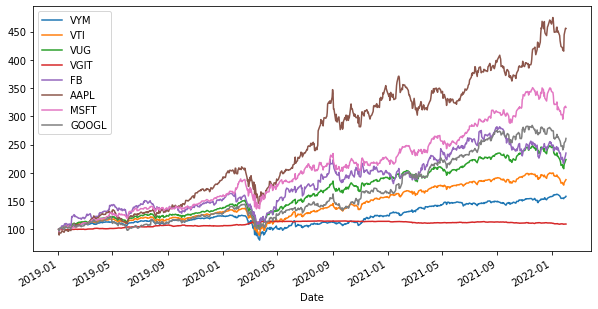

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

VYM      0.148432
VTI      0.203229
VUG      0.259042
VGIT     0.029213
FB       0.275062
AAPL     0.487908
MSFT     0.369955
GOOGL    0.308691
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,VYM,VTI,VUG,VGIT,FB,AAPL,MSFT,GOOGL
VYM,0.047482,0.045663,0.042149,-0.003595,0.038598,0.045838,0.044175,0.040778
VTI,0.045663,0.050629,0.052164,-0.003173,0.053236,0.059157,0.056328,0.051320
VUG,0.042149,0.052164,0.059217,-0.002809,0.064861,0.070207,0.066717,0.059287
VGIT,-0.003595,-0.003173,-0.002809,0.001349,-0.002528,-0.003515,-0.003010,-0.002781
FB,0.038598,0.053236,0.064861,-0.002528,0.124250,0.078580,0.071844,0.073707
AAPL,0.045838,0.059157,0.070207,-0.003515,0.078580,0.115597,0.079654,0.067960
MSFT,0.044175,0.056328,0.066717,-0.003010,0.071844,0.079654,0.091715,0.070721
GOOGL,0.040778,0.051320,0.059287,-0.002781,0.073707,0.067960,0.070721,0.087179


In [9]:
log_returns.corr() #get correlation between each pair.

,VYM,VTI,VUG,VGIT,FB,AAPL,MSFT,GOOGL
VYM,1.000000,0.931321,0.794876,-0.449201,0.502518,0.618717,0.669412,0.633811
VTI,0.931321,1.000000,0.952669,-0.384033,0.671206,0.773267,0.826620,0.772461
VUG,0.794876,0.952669,1.000000,-0.314285,0.756155,0.848557,0.905294,0.825145
VGIT,-0.449201,-0.384033,-0.314285,1.000000,-0.195269,-0.281519,-0.270640,-0.256447
FB,0.502518,0.671206,0.756155,-0.195269,1.000000,0.655680,0.673010,0.708196
AAPL,0.618717,0.773267,0.848557,-0.281519,0.655680,1.000000,0.773599,0.676978
MSFT,0.669412,0.826620,0.905294,-0.270640,0.673010,0.773599,1.000000,0.790904
GOOGL,0.633811,0.772461,0.825145,-0.256447,0.708196,0.676978,0.790904,1.000000


### Expected Portfolio Return:

np.sum(weights * log_returns.mean()) * 250

### Expected Portfolio Variance:

np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

### Expected Portfolio Volatility:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

***

In [10]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [11]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [12]:
portfolios.head() #checking to see if any error

,Return,Volatility,VYM,VTI,VUG,VGIT,FB,AAPL,MSFT,GOOGL
0,0.303856,0.234083,0.100720,0.114758,0.048522,0.099987,0.085820,0.234098,0.239854,0.076240
1,0.259114,0.211594,0.049177,0.129072,0.123936,0.169175,0.130261,0.155971,0.029027,0.213380
2,0.293289,0.245899,0.040954,0.164326,0.239767,0.025238,0.020995,0.065897,0.266810,0.176013
3,0.325705,0.260766,0.144547,0.015675,0.087107,0.012589,0.191369,0.232639,0.235345,0.080728
4,0.315940,0.245693,0.152075,0.169943,0.130440,0.034808,0.016103,0.325888,0.128685,0.042058


In [13]:
portfolios.tail() #checking to see if any error

,Return,Volatility,VYM,VTI,VUG,VGIT,FB,AAPL,MSFT,GOOGL
2995,0.231454,0.202204,0.035179,0.212322,0.096990,0.199133,0.205929,0.050915,0.147912,0.051621
2996,0.287321,0.235998,0.045735,0.161584,0.079577,0.084668,0.149218,0.170159,0.083852,0.225208
2997,0.255524,0.204793,0.197793,0.007947,0.057380,0.186401,0.142854,0.134520,0.244988,0.028119
2998,0.301760,0.249252,0.179834,0.051733,0.068201,0.023078,0.180746,0.178967,0.182574,0.134868
2999,0.294179,0.234368,0.073178,0.017533,0.257522,0.090003,0.059921,0.216955,0.002236,0.282653


In [14]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,VYM,VTI,VUG,VGIT,FB,AAPL,MSFT,GOOGL
1382,0.145500,0.121748,0.130682,0.001446,0.198381,0.472206,0.108276,0.005853,0.037831,0.045325
442,0.172422,0.151612,0.197531,0.076209,0.080063,0.337336,0.085373,0.016817,0.025050,0.181622
734,0.199016,0.154000,0.024217,0.222058,0.066759,0.381587,0.113707,0.172120,0.009170,0.010383
2090,0.172465,0.154637,0.263203,0.003241,0.097683,0.328032,0.160863,0.038292,0.022382,0.086304
1501,0.185035,0.154827,0.252631,0.025490,0.117896,0.325396,0.045789,0.031409,0.199536,0.001854
...,...,...,...,...,...,...,...,...,...,...
501,0.316902,0.269038,0.073792,0.111596,0.012441,0.012017,0.320874,0.259067,0.002353,0.207860
2707,0.360705,0.269788,0.020344,0.046560,0.054605,0.044702,0.144233,0.343061,0.306172,0.040323
330,0.359096,0.270644,0.062441,0.005225,0.234393,0.023148,0.112472,0.418494,0.128136,0.015692
1584,0.329922,0.270753,0.092728,0.002551,0.124471,0.025900,0.321761,0.316189,0.064200,0.052200


Text(0, 0.5, 'Expected Return')

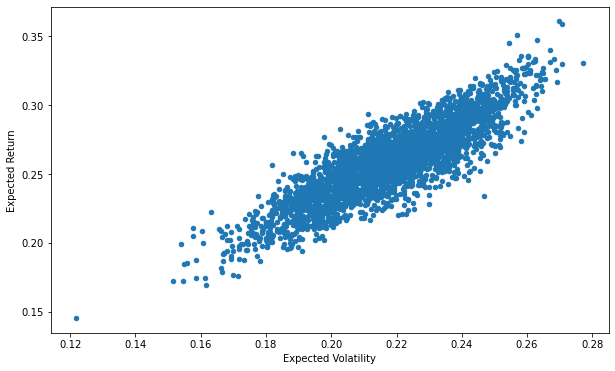

In [15]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [16]:
#generate path and name then export
path = 'results/'
name = '_'.join(assets) + '.csv'
path_name = path + name 
portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [17]:
# calculation
print("money amount calculation for demo use only, please don't simply invest on this results alone.")

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

total_investment = 25000
print("Intend to invest ${:.2f}".format(total_investment) + " total.")

money_inv = []
for i in range(num_assets):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    money_inv.append(inv)
    print("\t{:.0f}".format(money_inv[i] // pf_data.iloc[-1][i]) + " shares should long in ticker:" + assets[i])
    print("\t invest in " + assets[i] + " for ${:.2f}".format(inv) + ".")

print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%")
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%")

money amount calculation for demo use only, please don't simply invest on this results alone.
Intend to invest $25000.00 total.
	29 shares should long in ticker:VYM
	 invest in VYM for $3267.06.
	0 shares should long in ticker:VTI
	 invest in VTI for $36.16.
	16 shares should long in ticker:VUG
	 invest in VUG for $4959.52.
	180 shares should long in ticker:VGIT
	 invest in VGIT for $11805.14.
	8 shares should long in ticker:FB
	 invest in FB for $2706.91.
	0 shares should long in ticker:AAPL
	 invest in AAPL for $146.34.
	3 shares should long in ticker:MSFT
	 invest in MSFT for $945.76.
	0 shares should long in ticker:GOOGL
	 invest in GOOGL for $1133.12.
Expected annual portfolio return is 14.6%
Expected annual portfolio volatility is 12.2%
